# Class 31 - Reinforcement with pandas

* Dealing with missing data
* Using `apply` method to mutate data in columns
* Reshaping data to new formats
* Working with time series data

In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.max_columns = 161
pd.options.display.float_format = '{:,.2f}'.format

## Review

Reading in data and fixing columns.

In [2]:
gamelogs_df = pd.read_csv('GL2016.TXT',header=None)
gamelogs_df.columns = range(1,len(gamelogs_df.columns)+1)
gamelogs_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,4,51,N,NaN,nan,NaN,KAN06,40030,193,000000030,10010200x,33,7,1,0,0,3,0,0,0,6,0,9,0,1,0,0,9,3,3,3,0,0,24,15,1,1,3,0,30,9,0,0,0,4,0,1,0,2,0,3,1,0,3,0,5,5,3,3,0,0,27,13,0,0,0,0,davig901,Gerry Davis,holbs901,Sam Holbrook,drakr901,Rob Drake,torrc901,Carlos Torres,nan,(none),nan,(none),collt801,Terry Collins,yoste001,Ned Yost,volqe001,Edinson Volquez,harvm001,Matt Harvey,daviw001,Wade Davis,hosme001,Eric Hosmer,harvm001,Matt Harvey,volqe001,Edinson Volquez,granc001,Curtis Granderson,9,wrigd002,David Wright,5,cespy001,Yoenis Cespedes,7,dudal001,Lucas Duda,3,walkn001,Neil Walker,4,confm001,Michael Conforto,10,cabra002,Asdrubal Cabrera,6,darnt001,Travis d'Arnaud,2,lagaj001,Juan Lagares,8,escoa003,Alcides Escobar,6,mousm001,Mike Moustakas,5,cainl001,Lorenzo Cain,8,hosme001,Eric Hosmer,3,morak001,Kendrys Morales,10,gorda001,Alex Gordon,7,peres002,Salvador Perez,2,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,3,54,D,NaN,nan,NaN,STP01,31042,171,200100020,001000002,35,7,1,0,1,5,0,0,0,3,0,16,0,0,0,0,6,2,3,3,1,0,27,15,2,0,0,0,35,7,1,0,1,3,0,0,0,1,0,7,0,1,0,0,6,4,4,4,1,0,27,8,1,0,0,0,everm901,Mike Everitt,emmep901,Paul Emmel,timmt901,Tim Timmons,diazl901,Laz Diaz,nan,(none),nan,(none),gibbj001,John Gibbons,cashk001,Kevin Cash,strom001,Marcus Stroman,archc001,Chris Archer,osunr001,Roberto Osuna,encae001,Edwin Encarnacion,strom001,Marcus Stroman,archc001,Chris Archer,pillk001,Kevin Pillar,8,donaj001,Josh Donaldson,5,bautj002,Jose Bautista,9,encae001,Edwin Encarnacion,10,tulot001,Troy Tulowitzki,6,colac001,Chris Colabello,3,saunm001,Michael Saunders,7,martr004,Russell Martin,2,goinr001,Ryan Goins,4,forsl001,Logan Forsythe,4,morrl001,Logan Morrison,3,longe001,Evan Longoria,5,dickc002,Corey Dickerson,10,jennd002,Desmond Jennings,7,millb002,Brad Miller,6,souzs001,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,4,51,D,NaN,nan,NaN,PIT08,39500,182,000000001,02000101x,32,5,0,0,0,1,0,0,1,5,0,14,0,0,1,0,10,3,4,4,0,0,24,11,0,0,2,0,28,9,2,1,0,4,1,1,1,5,0,5,0,1,1,0,8,4,1,1,0,0,27,8,1,0,1,0,laynj901,Jerry Layne,wendh902,Hunter Wendelstedt,gibsh902,Tripp Gibson,fagac901,Clint Fagan,nan,(none),nan,(none),mathm001,Mike Matheny,hurdc001,Clint Hurdle,lirif001,Francisco Liriano,waina001,Adam Wainwright,NaN,(none),lirif001,Francisco Liriano,waina001,Adam Wainwright,lirif001,Francisco Liriano,carpm002,Matt Carpenter,5,phamt001,Tommy Pham,7,hollm001,Matt Holliday,3,gricr001,Randal Grichuk,8,piscs001,Stephen Piscotty,9,moliy001,Yadier Molina,2,wongk001,Kolten Wong,4,gyorj001,Jedd Gyorko,6,waina001,Adam Wainwright,1,jasoj001,John Jaso,3,mccua001,Andrew McCutchen,8,freed001,David Freese,5,marts002,Starling Marte,7,cervf001,Francisco Cervelli,2,polag001,Gregory Polanco,9,harrj002,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,0,54,N,NaN,nan,NaN,ANA01,44020,188,100202103,000000000,37,11,3,0,1,9,0,0,0,7,1,12,0,0,1,0,8,3,0,0,0,0,27,9,0,0,1,0,29,3,1,0,0,0,0,0,0,1,0,7,0,0,0,0,3,5,9,9,0,0,27,8,1,0,1,0,barrt901,Ted Barrett,herna901,Angel Hernandez,barkl901,Lance Barksdale,littw901,Will Little,nan,(none),nan,(none),maddj801,Joe Maddon,sciom001,Mike Scioscia,arrij001,Jake Arrieta,richg002,Garrett Richards,NaN,(none),rizza001,Anthony Rizzo,arrij001,Jake Arrieta,richg002,Garrett Richards,fowld001,Dexter Fowler,8,heywj001,Jason Heyward,9,zobrb001,Ben Z

Convert column 1 to true `datetime` objects.

In [3]:
gamelogs_df['datetime'] = pd.to_datetime(gamelogs_df[1],format='%Y%m%d')

Generate a histogram of attendance numbers. (column 18)

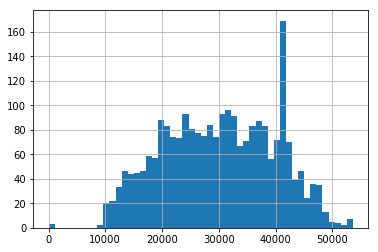

In [8]:
gamelogs_df[18].hist(bins=50)

What games had more than 2 hit-by-pitches? Add the visiting team's count in column 30 and home team's count in column 58.

In [17]:
gamelogs_df['total hit'] = gamelogs_df[30] + gamelogs_df[58]
gamelogs_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,...,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,datetime,total hit
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,4,51,N,NaN,nan,NaN,KAN06,40030,193,000000030,10010200x,33,7,1,0,0,3,0,0,0,6,0,9,0,1,0,0,9,3,3,3,0,0,24,15,1,1,3,0,30,9,0,0,0,4,0,1,0,2,0,3,1,0,3,0,5,5,3,3,0,0,27,13,0,0,0,0,davig901,Gerry Davis,holbs901,...,torrc901,Carlos Torres,nan,(none),nan,(none),collt801,Terry Collins,yoste001,Ned Yost,volqe001,Edinson Volquez,harvm001,Matt Harvey,daviw001,Wade Davis,hosme001,Eric Hosmer,harvm001,Matt Harvey,volqe001,Edinson Volquez,granc001,Curtis Granderson,9,wrigd002,David Wright,5,cespy001,Yoenis Cespedes,7,dudal001,Lucas Duda,3,walkn001,Neil Walker,4,confm001,Michael Conforto,10,cabra002,Asdrubal Cabrera,6,darnt001,Travis d'Arnaud,2,lagaj001,Juan Lagares,8,escoa003,Alcides Escobar,6,mousm001,Mike Moustakas,5,cainl001,Lorenzo Cain,8,hosme001,Eric Hosmer,3,morak001,Kendrys Morales,10,gorda001,Alex Gordon,7,peres002,Salvador Perez,2,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y,2016-04-03,0
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,3,54,D,NaN,nan,NaN,STP01,31042,171,200100020,001000002,35,7,1,0,1,5,0,0,0,3,0,16,0,0,0,0,6,2,3,3,1,0,27,15,2,0,0,0,35,7,1,0,1,3,0,0,0,1,0,7,0,1,0,0,6,4,4,4,1,0,27,8,1,0,0,0,everm901,Mike Everitt,emmep901,...,diazl901,Laz Diaz,nan,(none),nan,(none),gibbj001,John Gibbons,cashk001,Kevin Cash,strom001,Marcus Stroman,archc001,Chris Archer,osunr001,Roberto Osuna,encae001,Edwin Encarnacion,strom001,Marcus Stroman,archc001,Chris Archer,pillk001,Kevin Pillar,8,donaj001,Josh Donaldson,5,bautj002,Jose Bautista,9,encae001,Edwin Encarnacion,10,tulot001,Troy Tulowitzki,6,colac001,Chris Colabello,3,saunm001,Michael Saunders,7,martr004,Russell Martin,2,goinr001,Ryan Goins,4,forsl001,Logan Forsythe,4,morrl001,Logan Morrison,3,longe001,Evan Longoria,5,dickc002,Corey Dickerson,10,jennd002,Desmond Jennings,7,millb002,Brad Miller,6,souzs001,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y,2016-04-03,0
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,4,51,D,NaN,nan,NaN,PIT08,39500,182,000000001,02000101x,32,5,0,0,0,1,0,0,1,5,0,14,0,0,1,0,10,3,4,4,0,0,24,11,0,0,2,0,28,9,2,1,0,4,1,1,1,5,0,5,0,1,1,0,8,4,1,1,0,0,27,8,1,0,1,0,laynj901,Jerry Layne,wendh902,...,fagac901,Clint Fagan,nan,(none),nan,(none),mathm001,Mike Matheny,hurdc001,Clint Hurdle,lirif001,Francisco Liriano,waina001,Adam Wainwright,NaN,(none),lirif001,Francisco Liriano,waina001,Adam Wainwright,lirif001,Francisco Liriano,carpm002,Matt Carpenter,5,phamt001,Tommy Pham,7,hollm001,Matt Holliday,3,gricr001,Randal Grichuk,8,piscs001,Stephen Piscotty,9,moliy001,Yadier Molina,2,wongk001,Kolten Wong,4,gyorj001,Jedd Gyorko,6,waina001,Adam Wainwright,1,jasoj001,John Jaso,3,mccua001,Andrew McCutchen,8,freed001,David Freese,5,marts002,Starling Marte,7,cervf001,Francisco Cervelli,2,polag001,Gregory Polanco,9,harrj002,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y,2016-04-03,2
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,0,54,N,NaN,nan,NaN,ANA01,44020,188,100202103,000000000,37,11,3,0,1,9,0,0,0,7,1,12,0,0,1,0,8,3,0,0,0,0,27,9,0,0,1,0,29,3,1,0,0,0,0,0,0,1,0,7,0,0,0,0,3,5,9,9,0,0,27,8,1,0,1,0,barrt901,Ted Barrett,herna901,...,littw901,Will Little,nan,(none),nan,(none),maddj801,Joe Maddon,sciom001,Mike Scioscia,arrij001,Jake Arrieta,richg002,Garrett Richards,NaN,(none),rizza001,Anthony Rizzo,arrij001,Jake Arrieta,richg002,Garrett Richards,fowld001,Dexter Fowler,8,heywj001,Jason Heyward,9,zobrb001,Ben Zobrist,4,rizza001,Anthony Rizzo,3,bryak001,Kris Bryant,5,schwk001,Kyle Schwar

In [29]:
gamelogs_df[gamelogs_df['total hit'] > 2]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,...,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,datetime,total hit
19,20160405,0,Tue,SEA,AL,2,TEX,AL,2,10,2,54,N,NaN,nan,NaN,ARL02,28386,210,010100260,000200000,36,11,3,0,4,10,0,0,2,4,0,4,0,0,2,0,5,4,2,2,0,0,27,7,1,0,1,0,33,7,2,0,0,2,0,0,1,5,0,11,1,1,1,0,10,5,10,10,0,0,27,10,1,0,2,0,hudsm901,Marvin Hudson,hoyej901,...,joycj901,Jim Joyce,nan,(none),nan,(none),servs002,Scott Servais,banij001,Jeff Banister,vincn001,Nick Vincent,barnt002,Tony Barnette,NaN,(none),martl004,Leonys Martin,iwakh001,Hisashi Iwakuma,perem004,Martin Perez,aokin001,Nori Aoki,7,martk001,Ketel Marte,6,canor001,Robinson Cano,4,cruzn002,Nelson Cruz,10,seagk001,Kyle Seager,5,gutif001,Franklin Gutierrez,9,iannc001,Chris Iannetta,2,lee-d004,Dae-Ho Lee,3,martl004,Leonys Martin,8,deshd002,Delino DeShields,8,choos001,Shin-Soo Choo,9,fielp001,Prince Fielder,10,belta001,Adrian Beltre,5,morem001,Mitch Moreland,3,desmi001,Ian Desmond,7,odorr001,Rougned Odor,4,andre001,Elvis Andrus,6,chirr001,Robinson Chirinos,2,NaN,Y,2016-04-05,3
55,20160408,0,Fri,PIT,NL,4,CIN,NL,4,6,5,54,N,NaN,nan,NaN,CIN09,17194,204,010010040,201001100,35,8,1,0,1,6,0,0,3,6,0,10,1,0,1,0,11,4,4,4,2,0,27,15,3,0,2,0,30,6,0,0,1,4,1,1,1,6,0,5,3,0,2,0,7,7,5,5,1,0,27,8,3,0,1,0,fleta901,Andy Fletcher,rippm901,...,danlk901,Kerwin Danley,nan,(none),nan,(none),hurdc001,Clint Hurdle,pricb801,Bryan Price,voger001,Ryan Vogelsong,hoovj002,J.J. Hoover,melam001,Mark Melancon,marts002,Starling Marte,lirif001,Francisco Liriano,simoa001,Alfredo Simon,jasoj001,John Jaso,3,mccua001,Andrew McCutchen,8,freed001,David Freese,5,marts002,Starling Marte,7,cervf001,Francisco Cervelli,2,polag001,Gregory Polanco,9,harrj002,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,cozaz001,Zack Cozart,6,suare001,Eugenio Suarez,5,vottj001,Joey Votto,3,philb001,Brandon Phillips,4,mesod001,Devin Mesoraco,2,brucj001,Jay Bruce,9,duvaa001,Adam Duvall,7,simoa001,Alfredo Simon,1,hamib001,Billy Hamilton,8,NaN,Y,2016-04-08,4
79,20160410,0,Sun,SLN,NL,6,ATL,NL,5,12,7,54,D,NaN,nan,NaN,ATL02,23214,235,004001025,100311001,36,10,2,0,2,12,1,0,3,9,1,10,2,0,0,0,10,6,6,6,0,0,27,7,1,0,1,0,36,11,5,0,1,6,1,1,0,9,2,13,1,0,1,0,13,6,12,12,2,0,27,7,0,0,0,0,wegnm901,Mark Wegner,fostm901,...,wintm901,Mike Winters,nan,(none),nan,(none),mathm001,Mike Matheny,gonzf801,Fredi Gonzalez,oh--s001,Seung Hwan Oh,johnj010,Jim Johnson,roset001,Trevor Rosenthal,piscs001,Stephen Piscotty,waina001,Adam Wainwright,perew001,Williams Perez,carpm002,Matt Carpenter,5,hazej001,Jeremy Hazelbaker,8,piscs001,Stephen Piscotty,9,mossb001,Brandon Moss,7,adamm002,Matt Adams,3,moliy001,Yadier Molina,2,wongk001,Kolten Wong,4,garcg002,Greg Garcia,6,waina001,Adam Wainwright,1,aybae001,Erick Aybar,6,markn001,Nick Markakis,9,freef001,Freddie Freeman,3,garca004,Adonis Garcia,5,olivh001,Hector Olivera,7,flowt001,Tyler Flowers,2,petej002,Jace Peterson,4,stubd001,Drew Stubbs,8,perew001,Williams Perez,1,NaN,Y,2016-04-10,3
97,20160412,0,Tue,BAL,AL,7,BOS,AL,7,9,5,54,N,NaN,nan,NaN,BOS07,31114,203,000203400,200020010,36,11,2,0,3,9,0,1,1,5,1,9,1,0,0,0,7,4,5,5,1,0,27,13,0,0,2,0,35,10,4,0,1,4,0,0,2,1,0,4,0,0,1,0,6,4,9,9,1,0,27,8,0,1,0,0,buckc901,CB Bucknor,reynj901,...,culbf901,Fieldin Culbreth,nan,(none),nan,(none),showb801,Buck Showalter,farrj001,John Farrell,wrigm001,Mike Wright,buchc001,Clay Buchholz,NaN,(none),hardj003,J.J. Hardy,wrigm001,Mike Wright,buchc001,Clay Buchholz,rickj001,Joey Rickard,8,machm001,Manny Machado,5,davic003,Chris Davis,3,trumm001,Mark Trumbo,9,wietm001,Matt Wieters,2,alvap001,Pedro Alvarez,10,h

Load up the `Teams.csv` file from the Lahman database and filter it to only include the 2016 team data.

In [31]:
teams_df = pd.read_csv('./Teams.csv')
teams_2016_df = teams_df[teams_df['yearID'] == 2016]
teams_2016_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2805,2016,NL,ARI,ARI,W,4,162,81.00,69,93,N,N,N,N,752,5665,1479,285,56,190,463,"1,427.00",137.00,31.00,50.00,38.00,890,821,5.09,2,7,31,4354,1563,202,603,1318,101,143.00,0.98,Arizona Diamondbacks,Chase Field,"2,036,216.00",107,108,ARI,ARI,ARI
2806,2016,NL,ATL,ATL,E,5,161,81.00,68,93,N,N,N,N,649,5514,1404,295,27,122,502,"1,240.00",75.00,34.00,59.00,52.00,779,725,4.51,1,9,39,4343,1414,177,547,1227,101,134.00,0.98,Atlanta Braves,Turner Field,"2,020,914.00",102,104,ATL,ATL,ATL
2807,2016,AL,BAL,BAL,E,2,162,81.00,89,73,N,Y,N,N,744,5524,1413,265,6,253,468,"1,324.00",19.00,13.00,44.00,36.00,715,671,4.22,1,9,54,4296,1408,183,545,1248,80,165.00,0.99,Baltimore Orioles,Oriole Park at Camden Yards,"2,172,344.00",101,101,BAL,BAL,BAL
2808,2016,AL,BOS,BOS,E,1,162,81.00,93,69,Y,N,N,N,878,5670,1598,343,25,208,558,"1,160.00",83.00,24.00,43.00,40.00,694,640,4.00,9,5,43,4319,1342,176,490,1362,75,139.00,0.99,Boston Red Sox,Fenway Park II,"2,955,434.00",108,106,BOS,BOS,BOS
2809,2016,AL,CHA,CHW,C,4,162,81.00,78,84,N,N,N,N,686,5550,1428,277,33,168,455,"1,285.00",77.00,36.00,53.00,44.00,715,659,4.10,7,10,43,4340,1422,185,521,1270,95,148.00,0.98,Chicago White Sox,U.S. Cellular Field,"1,746,293.00",96,97,CHW,CHA,CHA


## Setting and resetting index

The index in `teams_2016_df` starts at 2805 rather than 0. Let's change it to 0 using the `.reset_index()` method. Note that this adds the index back as a column, which can be really helpful if you want to get data you care about back out of the index which is hard-to-access.

In [32]:
teams_2016_df.reset_index()

,index,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2805,2016,NL,ARI,ARI,W,4,162,81.00,69,93,N,N,N,N,752,5665,1479,285,56,190,463,"1,427.00",137.00,31.00,50.00,38.00,890,821,5.09,2,7,31,4354,1563,202,603,1318,101,143.00,0.98,Arizona Diamondbacks,Chase Field,"2,036,216.00",107,108,ARI,ARI,ARI
1,2806,2016,NL,ATL,ATL,E,5,161,81.00,68,93,N,N,N,N,649,5514,1404,295,27,122,502,"1,240.00",75.00,34.00,59.00,52.00,779,725,4.51,1,9,39,4343,1414,177,547,1227,101,134.00,0.98,Atlanta Braves,Turner Field,"2,020,914.00",102,104,ATL,ATL,ATL
2,2807,2016,AL,BAL,BAL,E,2,162,81.00,89,73,N,Y,N,N,744,5524,1413,265,6,253,468,"1,324.00",19.00,13.00,44.00,36.00,715,671,4.22,1,9,54,4296,1408,183,545,1248,80,165.00,0.99,Baltimore Orioles,Oriole Park at Camden Yards,"2,172,344.00",101,101,BAL,BAL,BAL
3,2808,2016,AL,BOS,BOS,E,1,162,81.00,93,69,Y,N,N,N,878,5670,1598,343,25,208,558,"1,160.00",83.00,24.00,43.00,40.00,694,640,4.00,9,5,43,4319,1342,176,490,1362,75,139.00,0.99,Boston Red Sox,Fenway Park II,"2,955,434.00",108,106,BOS,BOS,BOS
4,2809,2016,AL,CHA,CHW,C,4,162,81.00,78,84,N,N,N,N,686,5550,1428,277,33,168,455,"1,285.00",77.00,36.00,53.00,44.00,715,659,4.10,7,10,43,4340,1422,185,521,1270,95,148.00,0.98,Chicago White Sox,U.S. Cellular Field,"1,746,293.00",96,97,CHW,CHA,CHA
5,2810,2016,NL,CHN,CHC,C,1,162,81.00,103,58,Y,N,Y,Y,808,5503,1409,293,30,199,656,"1,339.00",66.00,34.00,96.00,37.00,556,511,3.15,5,15,38,4379,1125,163,495,1441,101,116.00,0.98,Chicago Cubs,Wrigley Field,"3,232,420.00",95,93,CHC,CHN,CHN
6,2811,2016,NL,CIN,CIN,C,5,162,81.00,68,94,N,N,N,N,716,5487,1403,277,33,164,452,"1,284.00",139.00,51.00,52.00,44.00,854,786,4.91,2,8,28,4326,1457,258,636,1241,102,142.00,0.98,Cincinnati Reds,Great American Ball Park,"1,894,085.00",99,100,CIN,CIN,CIN
7,2812,2016,AL,CLE,CLE,C,1,161,80.00,94,67,Y,N,Y,N,777,5484,1435,308,29,185,531,"1,246.00",134.00,31.00,49.00,60.00,676,617,3.84,5,11,37,4335,1330,186,461,1398,89,126.00,0.98,Cleveland Indians,Progressive Field,"1,591,667.00",110,109,CLE,CLE,CLE
8,2813,2016,NL,COL,COL,W,3,162,81.00,75,87,N,N,N,N,845,5614,1544,318,47,204,494,"1,330.00",66.00,39.00,40.00,34.00,860,779,4.91,2,9,37,4288,1532,181,547,1223,110,148.00,0.98,Colorado Rockies,Coors Field,"2,602,524.00",117,117,COL,COL,COL
9,2814,2016,AL,DET,DET,C,2,161,81.00,86,75,N,N,N,N,750,5526,1476,252,30,211,493,"1,303.00",58.00,29.00,53.00,38.00,721,672,4.24,3,8,47,4284,1417,182,462,1232,75,148.00,0.99,Detroit Tigers,Comerica Park,"2,493,859.00",101,101,DET,DET,DET


Alternatively we could drop the index because we don't care about it and keep the columns as they are.

In [33]:
teams_2016_df.reset_index(drop=True)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2016,NL,ARI,ARI,W,4,162,81.00,69,93,N,N,N,N,752,5665,1479,285,56,190,463,"1,427.00",137.00,31.00,50.00,38.00,890,821,5.09,2,7,31,4354,1563,202,603,1318,101,143.00,0.98,Arizona Diamondbacks,Chase Field,"2,036,216.00",107,108,ARI,ARI,ARI
1,2016,NL,ATL,ATL,E,5,161,81.00,68,93,N,N,N,N,649,5514,1404,295,27,122,502,"1,240.00",75.00,34.00,59.00,52.00,779,725,4.51,1,9,39,4343,1414,177,547,1227,101,134.00,0.98,Atlanta Braves,Turner Field,"2,020,914.00",102,104,ATL,ATL,ATL
2,2016,AL,BAL,BAL,E,2,162,81.00,89,73,N,Y,N,N,744,5524,1413,265,6,253,468,"1,324.00",19.00,13.00,44.00,36.00,715,671,4.22,1,9,54,4296,1408,183,545,1248,80,165.00,0.99,Baltimore Orioles,Oriole Park at Camden Yards,"2,172,344.00",101,101,BAL,BAL,BAL
3,2016,AL,BOS,BOS,E,1,162,81.00,93,69,Y,N,N,N,878,5670,1598,343,25,208,558,"1,160.00",83.00,24.00,43.00,40.00,694,640,4.00,9,5,43,4319,1342,176,490,1362,75,139.00,0.99,Boston Red Sox,Fenway Park II,"2,955,434.00",108,106,BOS,BOS,BOS
4,2016,AL,CHA,CHW,C,4,162,81.00,78,84,N,N,N,N,686,5550,1428,277,33,168,455,"1,285.00",77.00,36.00,53.00,44.00,715,659,4.10,7,10,43,4340,1422,185,521,1270,95,148.00,0.98,Chicago White Sox,U.S. Cellular Field,"1,746,293.00",96,97,CHW,CHA,CHA
5,2016,NL,CHN,CHC,C,1,162,81.00,103,58,Y,N,Y,Y,808,5503,1409,293,30,199,656,"1,339.00",66.00,34.00,96.00,37.00,556,511,3.15,5,15,38,4379,1125,163,495,1441,101,116.00,0.98,Chicago Cubs,Wrigley Field,"3,232,420.00",95,93,CHC,CHN,CHN
6,2016,NL,CIN,CIN,C,5,162,81.00,68,94,N,N,N,N,716,5487,1403,277,33,164,452,"1,284.00",139.00,51.00,52.00,44.00,854,786,4.91,2,8,28,4326,1457,258,636,1241,102,142.00,0.98,Cincinnati Reds,Great American Ball Park,"1,894,085.00",99,100,CIN,CIN,CIN
7,2016,AL,CLE,CLE,C,1,161,80.00,94,67,Y,N,Y,N,777,5484,1435,308,29,185,531,"1,246.00",134.00,31.00,49.00,60.00,676,617,3.84,5,11,37,4335,1330,186,461,1398,89,126.00,0.98,Cleveland Indians,Progressive Field,"1,591,667.00",110,109,CLE,CLE,CLE
8,2016,NL,COL,COL,W,3,162,81.00,75,87,N,N,N,N,845,5614,1544,318,47,204,494,"1,330.00",66.00,39.00,40.00,34.00,860,779,4.91,2,9,37,4288,1532,181,547,1223,110,148.00,0.98,Colorado Rockies,Coors Field,"2,602,524.00",117,117,COL,COL,COL
9,2016,AL,DET,DET,C,2,161,81.00,86,75,N,N,N,N,750,5526,1476,252,30,211,493,"1,303.00",58.00,29.00,53.00,38.00,721,672,4.24,3,8,47,4284,1417,182,462,1232,75,148.00,0.99,Detroit Tigers,Comerica Park,"2,493,859.00",101,101,DET,DET,DET


Alternatively, we know that each line corresponds to the record for a single team. Rather than accessing a row via an arbitrary numeric index like 3 to get Boston's data, we could have a more expressive index that uses the team abbreviation. 

We can use the `.set_index()` method to change the index to a column already in the DataFrame or an array of values you've created elsewhere.

In [34]:
teamid_index_df = teams_2016_df.set_index('teamID')
teamid_index_df

,yearID,lgID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
teamID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARI,2016,NL,ARI,W,4,162,81.00,69,93,N,N,N,N,752,5665,1479,285,56,190,463,"1,427.00",137.00,31.00,50.00,38.00,890,821,5.09,2,7,31,4354,1563,202,603,1318,101,143.00,0.98,Arizona Diamondbacks,Chase Field,"2,036,216.00",107,108,ARI,ARI,ARI
ATL,2016,NL,ATL,E,5,161,81.00,68,93,N,N,N,N,649,5514,1404,295,27,122,502,"1,240.00",75.00,34.00,59.00,52.00,779,725,4.51,1,9,39,4343,1414,177,547,1227,101,134.00,0.98,Atlanta Braves,Turner Field,"2,020,914.00",102,104,ATL,ATL,ATL
BAL,2016,AL,BAL,E,2,162,81.00,89,73,N,Y,N,N,744,5524,1413,265,6,253,468,"1,324.00",19.00,13.00,44.00,36.00,715,671,4.22,1,9,54,4296,1408,183,545,1248,80,165.00,0.99,Baltimore Orioles,Oriole Park at Camden Yards,"2,172,344.00",101,101,BAL,BAL,BAL
BOS,2016,AL,BOS,E,1,162,81.00,93,69,Y,N,N,N,878,5670,1598,343,25,208,558,"1,160.00",83.00,24.00,43.00,40.00,694,640,4.00,9,5,43,4319,1342,176,490,1362,75,139.00,0.99,Boston Red Sox,Fenway Park II,"2,955,434.00",108,106,BOS,BOS,BOS
CHA,2016,AL,CHW,C,4,162,81.00,78,84,N,N,N,N,686,5550,1428,277,33,168,455,"1,285.00",77.00,36.00,53.00,44.00,715,659,4.10,7,10,43,4340,1422,185,521,1270,95,148.00,0.98,Chicago White Sox,U.S. Cellular Field,"1,746,293.00",96,97,CHW,CHA,CHA
CHN,2016,NL,CHC,C,1,162,81.00,103,58,Y,N,Y,Y,808,5503,1409,293,30,199,656,"1,339.00",66.00,34.00,96.00,37.00,556,511,3.15,5,15,38,4379,1125,163,495,1441,101,116.00,0.98,Chicago Cubs,Wrigley Field,"3,232,420.00",95,93,CHC,CHN,CHN
CIN,2016,NL,CIN,C,5,162,81.00,68,94,N,N,N,N,716,5487,1403,277,33,164,452,"1,284.00",139.00,51.00,52.00,44.00,854,786,4.91,2,8,28,4326,1457,258,636,1241,102,142.00,0.98,Cincinnati Reds,Great American Ball Park,"1,894,085.00",99,100,CIN,CIN,CIN
CLE,2016,AL,CLE,C,1,161,80.00,94,67,Y,N,Y,N,777,5484,1435,308,29,185,531,"1,246.00",134.00,31.00,49.00,60.00,676,617,3.84,5,11,37,4335,1330,186,461,1398,89,126.00,0.98,Cleveland Indians,Progressive Field,"1,591,667.00",110,109,CLE,CLE,CLE
COL,2016,NL,COL,W,3,162,81.00,75,87,N,N,N,N,845,5614,1544,318,47,204,494,"1,330.00",66.00,39.00,40.00,34.00,860,779,4.91,2,9,37,4288,1532,181,547,1223,110,148.00,0.98,Colorado Rockies,Coors Field,"2,602,524.00",117,117,COL,COL,COL


Now this allows us to access a row of data with a more intuitive label.

In [37]:
teamid_index_df.ix[['BOS',"COL"]]

,yearID,lgID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
teamID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BOS,2016,AL,BOS,E,1,162,81.00,93,69,Y,N,N,N,878,5670,1598,343,25,208,558,"1,160.00",83.00,24.00,43.00,40.00,694,640,4.00,9,5,43,4319,1342,176,490,1362,75,139.00,0.99,Boston Red Sox,Fenway Park II,"2,955,434.00",108,106,BOS,BOS,BOS
COL,2016,NL,COL,W,3,162,81.00,75,87,N,N,N,N,845,5614,1544,318,47,204,494,"1,330.00",66.00,39.00,40.00,34.00,860,779,4.91,2,9,37,4288,1532,181,547,1223,110,148.00,0.98,Colorado Rockies,Coors Field,"2,602,524.00",117,117,COL,COL,COL


## Dealing with missing data

Unfortunately for our purposes, baseball data nerds are meticuluous about having complete records, so it's difficult to find examples of missing data. Column 15 captures whether the game was [forfeited](http://www.baseball-reference.com/bullpen/Forfeit) by the visitor, home team, or ruled a no-decision and Column 16 captures whether the game was [protested](http://www.baseball-reference.com/bullpen/Protest) by the home or visiting team. There aren't any forfeits and only very few protests in 2016 games:

In [38]:
gamelogs_df[15].value_counts()

Series([], Name: 15, dtype: int64)

In [39]:
gamelogs_df[16].value_counts()

H    2
V    1
Name: 16, dtype: int64

The missing values for the non-protests games are shown as "NaN" which basically means blank. We can fill these NaN values in a column with another value rather leaving them blank using the `.fillna()` method.

Using 0 as a value for `.fillna()` returns:

In [42]:
gamelogs_df[16].fillna(0)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      H
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2398    0
2399    0
2400    0
2401    0
2402    0
2403    0
2404    0
2405    0
2406    0
2407    0
2408    0
2409    0
2410    0
2411    0
2412    0
2413    0
2414    0
2415    0
2416    0
2417    0
2418    0
2419    0
2420    0
2421    0
2422    0
2423    0
2424    0
2425    0
2426    0
2427    0
Name: 16, dtype: object

## Using `apply` and `map` methods to mutate data

Columns 20 and 21 are the box scores stored as strings. We can use the `.apply()` method to pass a function into each of these values and get the result out.

Recall that calling `list` on a string will break the string up into its individual characters.

In [43]:
s = 'baseball'
list(s)

['b', 'a', 's', 'e', 'b', 'a', 'l', 'l']

We can use this same logic to apply list to each of the strings in a column to return a list by passing the name of a function into apply.

In [45]:
gamelogs_df[20].apply(list)

0             [0, 0, 0, 0, 0, 0, 0, 3, 0]
1             [2, 0, 0, 1, 0, 0, 0, 2, 0]
2             [0, 0, 0, 0, 0, 0, 0, 0, 1]
3             [1, 0, 0, 2, 0, 2, 1, 0, 3]
4             [0, 0, 0, 0, 0, 0, 2, 0, 0]
5             [0, 0, 4, 0, 0, 0, 0, 0, 0]
6             [0, 0, 1, 3, 1, 0, 0, 0, 0]
7             [1, 1, 0, 0, 0, 0, 0, 0, 0]
8             [0, 0, 6, 1, 0, 0, 0, 3, 0]
9          [1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
10            [0, 2, 0, 0, 0, 0, 0, 0, 0]
11            [0, 2, 2, 1, 2, 0, 0, 5, 0]
12            [2, 0, 1, 0, 0, 5, 3, 4, 0]
13            [0, 0, 4, 0, 0, 0, 2, 0, 0]
14            [0, 0, 2, 0, 0, 2, 0, 0, 2]
15            [0, 0, 0, 2, 0, 0, 0, 0, 0]
16            [0, 0, 0, 1, 0, 1, 0, 3, 0]
17            [0, 0, 0, 0, 3, 1, 0, 0, 1]
18            [0, 0, 0, 2, 0, 0, 0, 0, 0]
19            [0, 1, 0, 1, 0, 0, 2, 6, 0]
20            [0, 0, 0, 6, 0, 0, 0, 0, 0]
21      [1, 3, 0, 0, 1, 0, 0, 0, 2, 0, 1]
22            [0, 0, 1, 1, 0, 0, 0, 0, 0]
23      [0, 0, 2, 2, 1, 0, 0, 0, 0

An alternative is to use lambda functions which gives you a temporary variable to use to pass into a function that accepts multiple arguments.

In [46]:
gamelogs_df[20].apply(lambda x:list(x))

0             [0, 0, 0, 0, 0, 0, 0, 3, 0]
1             [2, 0, 0, 1, 0, 0, 0, 2, 0]
2             [0, 0, 0, 0, 0, 0, 0, 0, 1]
3             [1, 0, 0, 2, 0, 2, 1, 0, 3]
4             [0, 0, 0, 0, 0, 0, 2, 0, 0]
5             [0, 0, 4, 0, 0, 0, 0, 0, 0]
6             [0, 0, 1, 3, 1, 0, 0, 0, 0]
7             [1, 1, 0, 0, 0, 0, 0, 0, 0]
8             [0, 0, 6, 1, 0, 0, 0, 3, 0]
9          [1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
10            [0, 2, 0, 0, 0, 0, 0, 0, 0]
11            [0, 2, 2, 1, 2, 0, 0, 5, 0]
12            [2, 0, 1, 0, 0, 5, 3, 4, 0]
13            [0, 0, 4, 0, 0, 0, 2, 0, 0]
14            [0, 0, 2, 0, 0, 2, 0, 0, 2]
15            [0, 0, 0, 2, 0, 0, 0, 0, 0]
16            [0, 0, 0, 1, 0, 1, 0, 3, 0]
17            [0, 0, 0, 0, 3, 1, 0, 0, 1]
18            [0, 0, 0, 2, 0, 0, 0, 0, 0]
19            [0, 1, 0, 1, 0, 0, 2, 6, 0]
20            [0, 0, 0, 6, 0, 0, 0, 0, 0]
21      [1, 3, 0, 0, 1, 0, 0, 0, 2, 0, 1]
22            [0, 0, 1, 1, 0, 0, 0, 0, 0]
23      [0, 0, 2, 2, 1, 0, 0, 0, 0

If a team scores 10 or more runs in the first inning and no runs for the remaining 8 innings, the box score would be "(10)00000000"

What's a problem with this `list` approach given this case?

In [47]:
list('(10)00000000')

['(', '1', '0', ')', '0', '0', '0', '0', '0', '0', '0', '0']

We can also mutate the data with the `.map()` method that will replace data following a pattern you define in a dictionary. The map method accepts a dictionary where the keys are the current names you want to replace and the values in the dictionary are the new names you want to use.

Let's replace 'D' and 'N' with "day" and "night" respectively and store as a new column "time_of_day".

In [48]:
replace_dict = {'D':'Day','N':'Night'}
gamelogs_df['Time of day'] = gamelogs_df[13].map(replace_dict)
gamelogs_df['Time of day']

0       Night
1         Day
2         Day
3       Night
4         Day
5       Night
6       Night
7         Day
8       Night
9         Day
10        Day
11        Day
12        Day
13      Night
14        Day
15        Day
16        Day
17      Night
18      Night
19      Night
20      Night
21      Night
22      Night
23      Night
24      Night
25      Night
26      Night
27      Night
28      Night
29        Day
        ...  
2398    Night
2399    Night
2400    Night
2401      Day
2402      Day
2403    Night
2404    Night
2405    Night
2406    Night
2407      Day
2408    Night
2409      Day
2410      Day
2411      Day
2412      Day
2413      Day
2414      Day
2415      Day
2416      Day
2417      Day
2418      Day
2419      Day
2420      Day
2421      Day
2422      Day
2423      Day
2424      Day
2425      Day
2426      Day
2427      Day
Name: Time of day, dtype: object

In [49]:
renamed_columns_dict = {8:'League',3:'Day of week',18:'Attendance'}
renamed_gamelogs_df = gamelogs_df.rename(columns=renamed_columns_dict)
renamed_gamelogs_df.head()

,1,2,Day of week,4,5,6,7,League,9,10,11,12,13,14,15,16,17,Attendance,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,datetime,total hit,Time of day
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,4,51,N,NaN,nan,NaN,KAN06,40030,193,000000030,10010200x,33,7,1,0,0,3,0,0,0,6,0,9,0,1,0,0,9,3,3,3,0,0,24,15,1,1,3,0,30,9,0,0,0,4,0,1,0,2,0,3,1,0,3,0,5,5,3,3,0,0,27,13,0,0,0,0,davig901,Gerry Davis,holbs901,...,Carlos Torres,nan,(none),nan,(none),collt801,Terry Collins,yoste001,Ned Yost,volqe001,Edinson Volquez,harvm001,Matt Harvey,daviw001,Wade Davis,hosme001,Eric Hosmer,harvm001,Matt Harvey,volqe001,Edinson Volquez,granc001,Curtis Granderson,9,wrigd002,David Wright,5,cespy001,Yoenis Cespedes,7,dudal001,Lucas Duda,3,walkn001,Neil Walker,4,confm001,Michael Conforto,10,cabra002,Asdrubal Cabrera,6,darnt001,Travis d'Arnaud,2,lagaj001,Juan Lagares,8,escoa003,Alcides Escobar,6,mousm001,Mike Moustakas,5,cainl001,Lorenzo Cain,8,hosme001,Eric Hosmer,3,morak001,Kendrys Morales,10,gorda001,Alex Gordon,7,peres002,Salvador Perez,2,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y,2016-04-03,0,Night
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,3,54,D,NaN,nan,NaN,STP01,31042,171,200100020,001000002,35,7,1,0,1,5,0,0,0,3,0,16,0,0,0,0,6,2,3,3,1,0,27,15,2,0,0,0,35,7,1,0,1,3,0,0,0,1,0,7,0,1,0,0,6,4,4,4,1,0,27,8,1,0,0,0,everm901,Mike Everitt,emmep901,...,Laz Diaz,nan,(none),nan,(none),gibbj001,John Gibbons,cashk001,Kevin Cash,strom001,Marcus Stroman,archc001,Chris Archer,osunr001,Roberto Osuna,encae001,Edwin Encarnacion,strom001,Marcus Stroman,archc001,Chris Archer,pillk001,Kevin Pillar,8,donaj001,Josh Donaldson,5,bautj002,Jose Bautista,9,encae001,Edwin Encarnacion,10,tulot001,Troy Tulowitzki,6,colac001,Chris Colabello,3,saunm001,Michael Saunders,7,martr004,Russell Martin,2,goinr001,Ryan Goins,4,forsl001,Logan Forsythe,4,morrl001,Logan Morrison,3,longe001,Evan Longoria,5,dickc002,Corey Dickerson,10,jennd002,Desmond Jennings,7,millb002,Brad Miller,6,souzs001,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y,2016-04-03,0,Day
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,4,51,D,NaN,nan,NaN,PIT08,39500,182,000000001,02000101x,32,5,0,0,0,1,0,0,1,5,0,14,0,0,1,0,10,3,4,4,0,0,24,11,0,0,2,0,28,9,2,1,0,4,1,1,1,5,0,5,0,1,1,0,8,4,1,1,0,0,27,8,1,0,1,0,laynj901,Jerry Layne,wendh902,...,Clint Fagan,nan,(none),nan,(none),mathm001,Mike Matheny,hurdc001,Clint Hurdle,lirif001,Francisco Liriano,waina001,Adam Wainwright,NaN,(none),lirif001,Francisco Liriano,waina001,Adam Wainwright,lirif001,Francisco Liriano,carpm002,Matt Carpenter,5,phamt001,Tommy Pham,7,hollm001,Matt Holliday,3,gricr001,Randal Grichuk,8,piscs001,Stephen Piscotty,9,moliy001,Yadier Molina,2,wongk001,Kolten Wong,4,gyorj001,Jedd Gyorko,6,waina001,Adam Wainwright,1,jasoj001,John Jaso,3,mccua001,Andrew McCutchen,8,freed001,David Freese,5,marts002,Starling Marte,7,cervf001,Francisco Cervelli,2,polag001,Gregory Polanco,9,harrj002,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y,2016-04-03,2,Day
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,0,54,N,NaN,nan,NaN,ANA01,44020,188,100202103,000000000,37,11,3,0,1,9,0,0,0,7,1,12,0,0,1,0,8,3,0,0,0,0,27,9,0,0,1,0,29,3,1,0,0,0,0,0,0,1,0,7,0,0,0,0,3,5,9,9,0,0,27,8,1,0,1,0,barrt901,Ted Barrett,herna901,...,Will Little,nan,(none),nan,(none),maddj801,Joe Maddon,sciom001,Mike Scioscia,arrij001,Jake Arrieta,richg002,Garrett Richards,NaN,(none),rizza001,Anthony Rizzo,arrij001,Jake Arrieta,richg002,Garrett Richards,fowld001,Dexter Fowler,8,heywj001,Jason Heyward,9,zobrb001,Ben Zobrist,4,rizza001,Anthony Rizzo,3,bryak001,Kris Bryant,5,schwk001,K

## Reshaping data

Let's take the attendance data by game and compute the average value by day of the week (column 3), league (column 8), and night or day game (column 13). This is pretty complicated now!

In [57]:
pd.crosstab(renamed_gamelogs_df['Day of week'],renamed_gamelogs_df['League'],
            values=renamed_gamelogs_df['total hit'],aggfunc=np.mean)

League,AL,NL
Day of week,,
Fri,0.65,0.83
Mon,0.64,0.65
Sat,0.60,0.74
Sun,0.70,0.76
Thu,0.56,0.75
Tue,0.56,0.69
Wed,0.67,0.68


In [58]:
avg_attendance_ct = pd.crosstab(renamed_gamelogs_df['Day of week'],
                                [renamed_gamelogs_df['League'],renamed_gamelogs_df['Time of day']],values=renamed_gamelogs_df['Attendance'],aggfunc=np.mean)
avg_attendance_ct

League             AL                  NL          
Time of day       Day     Night       Day     Night
Day of week                                        
Fri         42,964.33 30,920.05 40,240.13 31,944.47
Mon         28,192.09 25,467.22 33,493.48 28,580.80
Sat         33,632.57 33,722.47 36,298.61 35,402.35
Sun         31,629.97 36,421.56 33,058.80 39,041.79
Thu         23,884.92 27,477.34 29,746.97 29,935.94
Tue         32,866.00 24,577.80 25,334.12 28,585.13
Wed         26,872.11 25,753.07 30,633.48 27,400.71

Let's clean this up a bit by unstacking the data with the `stack()` method. Note that the top columns (AL and NL) and the bottom columns (D and N) are now in the index. `stack()` defaults to stacking the bottom-most column, so the D/N columns are moved to the index.

In [59]:
avg_attendance_ct.stack()

League                         AL        NL
Day of week Time of day                    
Fri         Day         42,964.33 40,240.13
            Night       30,920.05 31,944.47
Mon         Day         28,192.09 33,493.48
            Night       25,467.22 28,580.80
Sat         Day         33,632.57 36,298.61
            Night       33,722.47 35,402.35
Sun         Day         31,629.97 33,058.80
            Night       36,421.56 39,041.79
Thu         Day         23,884.92 29,746.97
            Night       27,477.34 29,935.94
Tue         Day         32,866.00 25,334.12
            Night       24,577.80 28,585.13
Wed         Day         26,872.11 30,633.48
            Night       25,753.07 27,400.71

We can move both columns over to the index by passing their positions in a list: [0,1].

In [61]:
avg_attendance_ct.stack(level=[0,1]).reset_index()

,Day of week,League,Time of day,0
0,Fri,AL,Day,"42,964.33"
1,Fri,AL,Night,"30,920.05"
2,Fri,NL,Day,"40,240.13"
3,Fri,NL,Night,"31,944.47"
4,Mon,AL,Day,"28,192.09"
5,Mon,AL,Night,"25,467.22"
6,Mon,NL,Day,"33,493.48"
7,Mon,NL,Night,"28,580.80"
8,Sat,AL,Day,"33,632.57"
9,Sat,AL,Night,"33,722.47"


We can use `.reset_index()` to preserve all this information and return a simpler-to-interpret DataFrame.

In [62]:
unstacked_and_reset_df = avg_attendance_ct.stack(level=[0,1]).reset_index()

# The reset_index removes the "Attendance" column, so add it back in. Use the inplace=True to update immediately
unstacked_and_reset_df.rename(columns={0:'Attendance'},inplace=True)

unstacked_and_reset_df

,Day of week,League,Time of day,Attendance
0,Fri,AL,Day,"42,964.33"
1,Fri,AL,Night,"30,920.05"
2,Fri,NL,Day,"40,240.13"
3,Fri,NL,Night,"31,944.47"
4,Mon,AL,Day,"28,192.09"
5,Mon,AL,Night,"25,467.22"
6,Mon,NL,Day,"33,493.48"
7,Mon,NL,Night,"28,580.80"
8,Sat,AL,Day,"33,632.57"
9,Sat,AL,Night,"33,722.47"


If you have [seaborn](https://seaborn.pydata.org/) installed, we can visualize this data using this really nice "tidy" data.

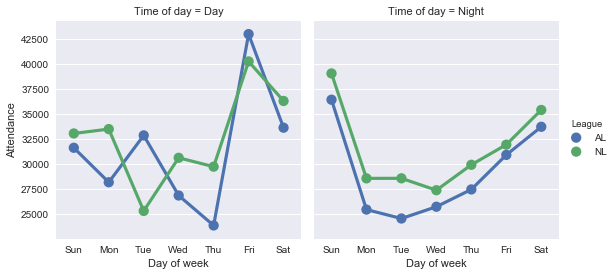

In [64]:
import seaborn as sb

week_days = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

sb.factorplot(x='Day of week',y='Attendance',hue='League',col='Time of day',data=unstacked_and_reset_df,order=week_days)

Even fancier:

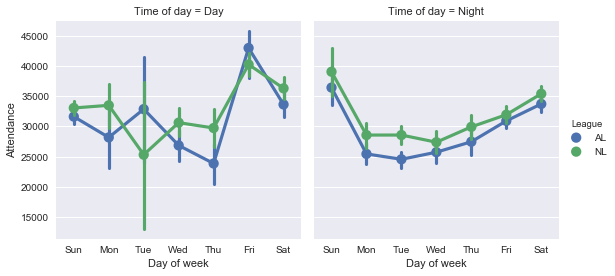

In [65]:
sb.factorplot(x='Day of week',y='Attendance',hue='League',col='Time of day',
              data=renamed_gamelogs_df,order=week_days,col_order=['Day','Night'])

We can work backwards from this kind of data and stack it back to its original configuration.

First, set the index to the combination of values: league, day/night, and day of the week. The `[0]` returns a Series rather than a DataFrame with 1 column.

In [66]:
unstacked_and_reset_df.head()

,Day of week,League,Time of day,Attendance
0,Fri,AL,Day,"42,964.33"
1,Fri,AL,Night,"30,920.05"
2,Fri,NL,Day,"40,240.13"
3,Fri,NL,Night,"31,944.47"
4,Mon,AL,Day,"28,192.09"


In [67]:
reindexed = unstacked_and_reset_df.set_index(['Day of week','League','Time of day'])['Attendance']
reindexed

Day of week  League  Time of day
Fri          AL      Day           42,964.33
                     Night         30,920.05
             NL      Day           40,240.13
                     Night         31,944.47
Mon          AL      Day           28,192.09
                     Night         25,467.22
             NL      Day           33,493.48
                     Night         28,580.80
Sat          AL      Day           33,632.57
                     Night         33,722.47
             NL      Day           36,298.61
                     Night         35,402.35
Sun          AL      Day           31,629.97
                     Night         36,421.56
             NL      Day           33,058.80
                     Night         39,041.79
Thu          AL      Day           23,884.92
                     Night         27,477.34
             NL      Day           29,746.97
                     Night         29,935.94
Tue          AL      Day           32,866.00
                     N

Now stack this MultiIndex back to columns. We pass the level arguments [1,2] which refer to the second and third part of the three-level index: the league and the day or night.

In [68]:
reindexed.unstack(level=[1,2])

League             AL                  NL          
Time of day       Day     Night       Day     Night
Day of week                                        
Fri         42,964.33 30,920.05 40,240.13 31,944.47
Mon         28,192.09 25,467.22 33,493.48 28,580.80
Sat         33,632.57 33,722.47 36,298.61 35,402.35
Sun         31,629.97 36,421.56 33,058.80 39,041.79
Thu         23,884.92 27,477.34 29,746.97 29,935.94
Tue         32,866.00 24,577.80 25,334.12 28,585.13
Wed         26,872.11 25,753.07 30,633.48 27,400.71

Try unstacking the days of the week or other combinations.

In [71]:
reindexed.unstack(level=[2,1])

Time of day,Day,Night,Day,Night
League,AL,AL,NL,NL
Day of week,,,,
Fri,"42,964.33","30,920.05","40,240.13","31,944.47"
Mon,"28,192.09","25,467.22","33,493.48","28,580.80"
Sat,"33,632.57","33,722.47","36,298.61","35,402.35"
Sun,"31,629.97","36,421.56","33,058.80","39,041.79"
Thu,"23,884.92","27,477.34","29,746.97","29,935.94"
Tue,"32,866.00","24,577.80","25,334.12","28,585.13"
Wed,"26,872.11","25,753.07","30,633.48","27,400.71"


## Working with time series

MLB goes on the All Star break in mid-July and no games are played for a few days. As a result, while there are games being played every day from early April, there are four days in July that don't exist.

Compute the average attendance across all games in each league by day -- and focus on dates in July. For instance, July 11 doesn't appear in the "datetime" column.

In [72]:
# Compute the crosstab of dates and league with the values being attendance, using aggfunc to compute the average
avg_league_attendance_ct = pd.crosstab(gamelogs_df['datetime'],gamelogs_df[8],values=gamelogs_df[18],aggfunc=np.mean)

# Use list slicing to return dates in July
avg_league_attendance_ct.ix['2016-07-01':'2016-07-31']

8,AL,NL
datetime,,
2016-07-01,"28,955.71","34,629.38"
2016-07-02,"30,771.43","37,538.00"
2016-07-03,"29,492.29","32,225.75"
2016-07-04,"29,326.43","36,282.50"
2016-07-05,"23,641.29","32,128.88"
2016-07-06,"26,717.29","31,969.12"
2016-07-07,"30,166.50","40,240.40"
2016-07-08,"36,335.88","35,587.00"
2016-07-09,"36,048.75","39,084.29"


We can put the missing dates back in!

First off, what are the min and max dates of the regular season?

In [73]:
str(min(avg_league_attendance_ct.index).date()), str(max(avg_league_attendance_ct.index).date())

('2016-04-03', '2016-10-02')

Then use the `pd.date_range()` function can generate a range of dates without any gaps.

In [74]:
pd.date_range('2016-04-03','2016-10-02')

DatetimeIndex(['2016-04-03', '2016-04-04', '2016-04-05', '2016-04-06',
               '2016-04-07', '2016-04-08', '2016-04-09', '2016-04-10',
               '2016-04-11', '2016-04-12',
               ...
               '2016-09-23', '2016-09-24', '2016-09-25', '2016-09-26',
               '2016-09-27', '2016-09-28', '2016-09-29', '2016-09-30',
               '2016-10-01', '2016-10-02'],
              dtype='datetime64[ns]', length=183, freq='D')

And we can use the `reindex()` method with the correct non-gappy dates to create a new DataFrame we'll call "reindexed_league_attendance_ct".

In [75]:
reindexed_league_attendance_ct = avg_league_attendance_ct.reindex(pd.date_range('2016-04-03','2016-10-02'))
reindexed_league_attendance_ct.ix['2016-07-01':'2016-07-31']

8,AL,NL
2016-07-01,"28,955.71","34,629.38"
2016-07-02,"30,771.43","37,538.00"
2016-07-03,"29,492.29","32,225.75"
2016-07-04,"29,326.43","36,282.50"
2016-07-05,"23,641.29","32,128.88"
2016-07-06,"26,717.29","31,969.12"
2016-07-07,"30,166.50","40,240.40"
2016-07-08,"36,335.88","35,587.00"
2016-07-09,"36,048.75","39,084.29"
2016-07-10,"32,908.12","36,460.71"


Fill in the gaps using the `.fillna()` method and plot!

In [76]:
reindexed_league_attendance_ct = reindexed_league_attendance_ct.fillna(0)
reindexed_league_attendance_ct.ix['2016-07-01':'2016-07-31']

8,AL,NL
2016-07-01,"28,955.71","34,629.38"
2016-07-02,"30,771.43","37,538.00"
2016-07-03,"29,492.29","32,225.75"
2016-07-04,"29,326.43","36,282.50"
2016-07-05,"23,641.29","32,128.88"
2016-07-06,"26,717.29","31,969.12"
2016-07-07,"30,166.50","40,240.40"
2016-07-08,"36,335.88","35,587.00"
2016-07-09,"36,048.75","39,084.29"
2016-07-10,"32,908.12","36,460.71"


Plot it!

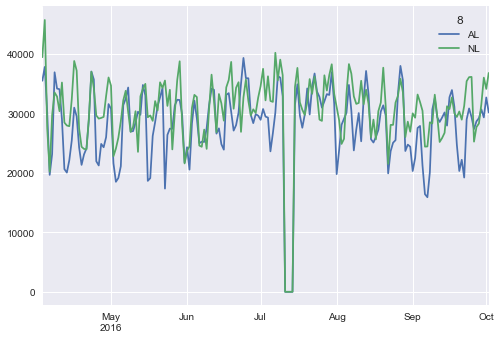

In [77]:
reindexed_league_attendance_ct.plot()

## Other fun

In [78]:
gamelogs_df['week'] = gamelogs_df['datetime'].apply(lambda x:x.week)

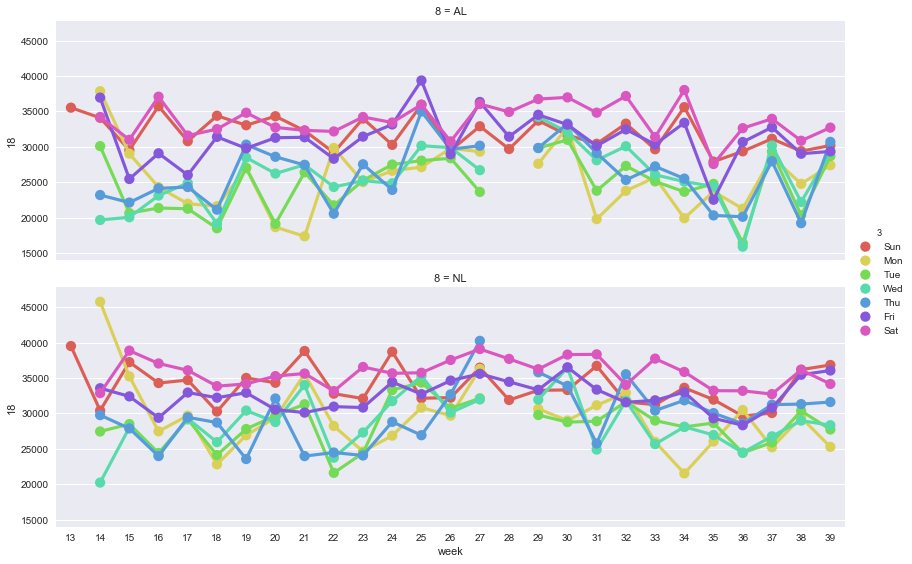

In [79]:
sb.factorplot(x='week',y=18,hue=3,row=8,data=gamelogs_df,aspect=3,hue_order=week_days,ci=0,palette='hls')